# Env

In [1]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import torch
torch.cuda.is_available()

True

# Loading Dataset with Roboflow

In [3]:
import roboflow

roboflow.login()
rf = roboflow.Roboflow()
project = rf.workspace("beansamuel").project("fire_detection-jq8cx")
dataset = project.version(3).download("yolov11")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to Fire_Detection-3 in yolov11:: 100%|██████████| 9894/9894 [00:01<00:00, 6963.04it/s]


In [5]:
%cd Fire_Detection-3

/content/Fire_Detection-3


# Loading Yolov5n with Ultralytics

In [8]:
from ultralytics import YOLO

model = YOLO("yolov5n.pt")

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



# Train
https://docs.ultralytics.com/modes/train/#train-settings

In [9]:
train_results = model.train(
    data="data.yaml",
    epochs=50,
    imgsz=640,
    batch = 64,
    device=0,  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)
path = model.export(format="onnx")

Ultralytics 8.3.132 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False,

train: Scanning /content/Fire_Detection-3/train/labels.cache... 4705 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4705/4705 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 414.4±112.4 MB/s, size: 54.8 KB)


val: Scanning /content/Fire_Detection-3/valid/labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.35G      1.711      2.558      1.757        298        640: 100%|██████████| 74/74 [01:19<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]

                   all        158        768      0.608      0.205      0.241     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.47G      1.568      1.891      1.629        345        640: 100%|██████████| 74/74 [01:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        158        768      0.286      0.339      0.206     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.85G        1.6      1.806      1.648        200        640: 100%|██████████| 74/74 [01:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all        158        768      0.227      0.306      0.206     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.55G      1.569      1.725      1.635        308        640: 100%|██████████| 74/74 [01:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all        158        768      0.307      0.349      0.262     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.68G       1.53      1.633      1.597        280        640: 100%|██████████| 74/74 [01:15<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        158        768       0.34      0.469      0.383      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.14G      1.509      1.552      1.565        309        640: 100%|██████████| 74/74 [01:15<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        158        768      0.454      0.458      0.417      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.89G      1.474      1.495      1.549        202        640: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        158        768      0.407      0.454      0.362      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       8.5G      1.454      1.449      1.527        272        640: 100%|██████████| 74/74 [01:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        158        768      0.367      0.483      0.382      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.66G      1.438      1.413      1.508        244        640: 100%|██████████| 74/74 [01:15<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        158        768      0.419      0.381      0.344      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.76G      1.423      1.382      1.494        302        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        158        768      0.403      0.493      0.432       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.89G      1.407      1.343      1.479        233        640: 100%|██████████| 74/74 [01:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        158        768      0.486      0.521      0.453      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.08G      1.388      1.301      1.459        284        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        158        768      0.445      0.507      0.446      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       8.4G      1.366      1.273      1.453        305        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        158        768      0.526      0.506      0.453      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.45G      1.352      1.252      1.442        263        640: 100%|██████████| 74/74 [01:15<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all        158        768      0.476      0.517      0.452      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.03G      1.331       1.22      1.426        221        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        158        768      0.455      0.483      0.426      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       8.5G      1.329        1.2      1.422        290        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        158        768      0.446      0.518      0.455      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.16G      1.309      1.168      1.405        318        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        158        768      0.482       0.49      0.444      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.66G      1.291      1.147      1.391        265        640: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        158        768       0.49      0.509      0.476      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.15G      1.285      1.128      1.392        211        640: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        158        768      0.544      0.501      0.489      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.36G      1.263      1.099      1.372        304        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        158        768      0.524      0.526      0.472      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.74G       1.27      1.096      1.371        245        640: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        158        768      0.525      0.553      0.489      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.04G      1.248      1.068      1.357        228        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        158        768      0.516      0.507      0.478      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.28G      1.245      1.063      1.357        238        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        158        768      0.513      0.543       0.49      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.06G      1.227      1.048      1.343        224        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        158        768      0.517      0.524       0.47      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.87G      1.213      1.023      1.337        322        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all        158        768      0.539      0.524      0.472      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.29G       1.21       1.01      1.327        286        640: 100%|██████████| 74/74 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

                   all        158        768      0.505      0.521      0.465      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.05G      1.206     0.9892      1.325        304        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all        158        768      0.544      0.553      0.496      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.44G      1.179     0.9648      1.305        209        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all        158        768      0.547      0.524      0.479       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.78G      1.176     0.9613      1.304        258        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        158        768      0.522      0.544      0.477      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.56G      1.167       0.95      1.297        292        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        158        768      0.533      0.525      0.479      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.79G      1.161     0.9374       1.29        277        640: 100%|██████████| 74/74 [01:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        158        768      0.499      0.546      0.483       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.08G      1.146     0.9224       1.28        273        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        158        768      0.526      0.512      0.475      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.12G      1.137     0.9107      1.276        253        640: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        158        768      0.541      0.546      0.499      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.03G      1.124     0.9043      1.271        237        640: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        158        768      0.557      0.509      0.485      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.41G      1.112     0.8749      1.257        315        640: 100%|██████████| 74/74 [01:17<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        158        768      0.541      0.531      0.497      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.06G      1.121     0.8831      1.259        307        640: 100%|██████████| 74/74 [01:15<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all        158        768        0.5      0.531      0.474       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.45G      1.111     0.8706      1.252        286        640: 100%|██████████| 74/74 [01:15<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        158        768      0.503      0.567      0.488       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.76G      1.093     0.8469      1.242        267        640: 100%|██████████| 74/74 [01:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        158        768      0.524       0.55      0.478      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.34G      1.096     0.8469       1.24        281        640: 100%|██████████| 74/74 [01:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        158        768      0.527      0.548      0.497      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.13G      1.081     0.8294      1.233        329        640: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all        158        768       0.55      0.502      0.488      0.251


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.99G      1.226     0.8524      1.302        163        640: 100%|██████████| 74/74 [01:17<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        158        768      0.553      0.534      0.498      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.73G      1.185     0.7998      1.277        146        640: 100%|██████████| 74/74 [01:10<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all        158        768      0.566      0.508       0.48      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         8G      1.169     0.7818      1.265        149        640: 100%|██████████| 74/74 [01:09<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        158        768      0.496      0.552      0.474      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.73G      1.146     0.7615      1.247        172        640: 100%|██████████| 74/74 [01:09<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        158        768      0.524      0.526      0.486      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.98G      1.132     0.7534      1.237        154        640: 100%|██████████| 74/74 [01:10<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all        158        768        0.5      0.527      0.483      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.73G      1.107     0.7295      1.221        123        640: 100%|██████████| 74/74 [01:08<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        158        768      0.522      0.537      0.491      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.96G      1.096     0.7184      1.213        158        640: 100%|██████████| 74/74 [01:11<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        158        768      0.503      0.534      0.474      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         8G      1.082     0.7045      1.205        139        640: 100%|██████████| 74/74 [01:09<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all        158        768      0.527      0.521      0.495      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.96G      1.078     0.7017      1.201        197        640: 100%|██████████| 74/74 [01:09<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        158        768      0.515      0.548      0.496      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.97G      1.071     0.6966      1.198        174        640: 100%|██████████| 74/74 [01:10<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        158        768      0.502      0.532      0.485      0.241



50 epochs completed in 1.078 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.132 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


                   all        158        768      0.545       0.54      0.501      0.259
                  fire        154        431      0.395       0.35      0.301      0.132
                person         37        182      0.442        0.4      0.332     0.0963
                 smoke        148        155      0.798      0.869      0.871      0.549
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.132 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━

# Validation

In [10]:
metrics = model.val()

Ultralytics 8.3.132 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1336.1±462.3 MB/s, size: 51.2 KB)


val: Scanning /content/Fire_Detection-3/valid/labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.75s/it]


                   all        158        768      0.541      0.541      0.501      0.259
                  fire        154        431      0.398      0.354      0.302      0.132
                person         37        182      0.427      0.401      0.332     0.0961
                 smoke        148        155      0.799      0.869       0.87      0.549
Speed: 11.8ms preprocess, 6.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train22



image 1/1 /content/Fire_Detection-3/test/images/fire-3009-_png.rf.a0bc2ee8918bda7efe8a7812955e0d1f.jpg: 640x640 1 fire, 1 smoke, 11.8ms
Speed: 2.4ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


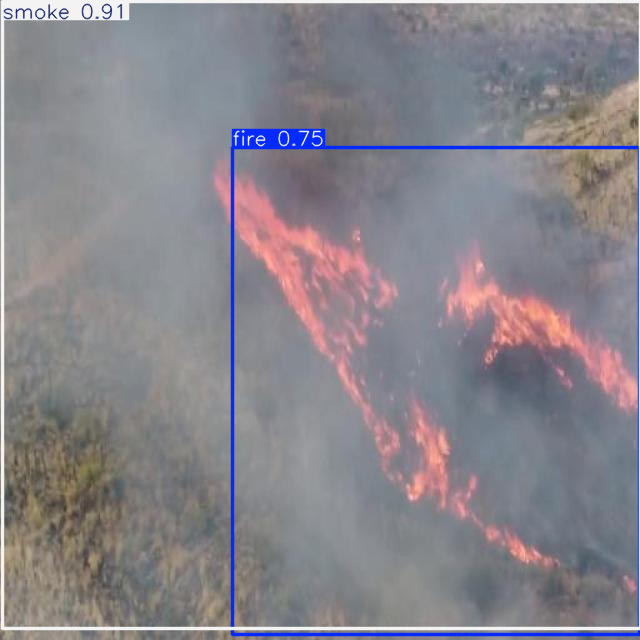

In [19]:
results = model("/content/Fire_Detection-3/test/images/fire-3009-_png.rf.a0bc2ee8918bda7efe8a7812955e0d1f.jpg")
results[0].show()  # Display results

In [18]:
results[0].save()

'results_fire-1121-_png.rf.792c0dfea85b4bddefaaaae66c5d4266.jpg'

In [27]:
results[0].speed


{'preprocess': 2.427426999929594,
 'inference': 11.805201999777637,
 'postprocess': 1.8436000000292552}

In [28]:
model2 = model = YOLO("/content/Fire_Detection-3/runs/detect/train2/weights/best.pt")

In [29]:
result = model2("/content/Fire_Detection-3/test/images/fire-3009-_png.rf.a0bc2ee8918bda7efe8a7812955e0d1f.jpg")


image 1/1 /content/Fire_Detection-3/test/images/fire-3009-_png.rf.a0bc2ee8918bda7efe8a7812955e0d1f.jpg: 640x640 1 fire, 1 smoke, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


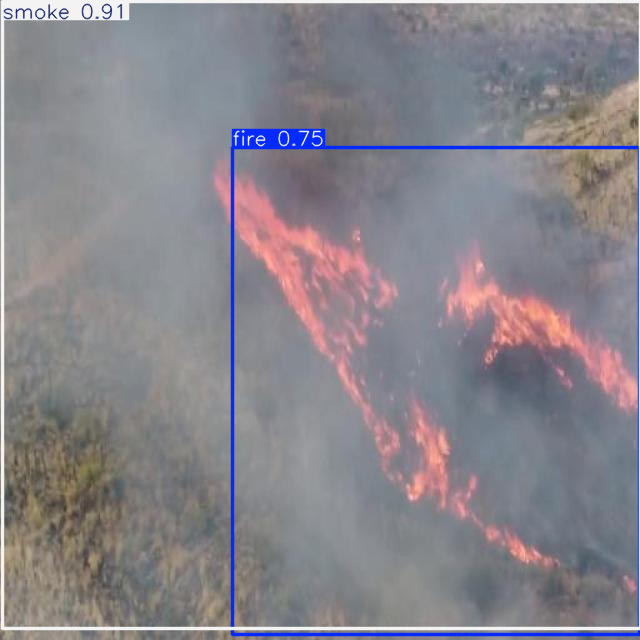

In [33]:
result[0].show()

In [35]:
annotated = results[0].plot()

In [36]:
print(annotated)

[[[148 144 143]
  [187 185 184]
  [243 243 243]
  ...
  [243 243 243]
  [243 243 243]
  [243 243 243]]

 [[181 178 178]
  [243 243 243]
  [243 243 243]
  ...
  [243 243 243]
  [243 243 243]
  [243 243 243]]

 [[169 165 165]
  [243 243 243]
  [243 243 243]
  ...
  [243 243 243]
  [243 243 243]
  [243 243 243]]

 ...

 [[ 90  97 106]
  [ 97 106 115]
  [116 125 134]
  ...
  [121 119 119]
  [122 120 120]
  [122 120 120]]

 [[ 96 102 109]
  [ 99 107 114]
  [115 123 130]
  ...
  [122 120 120]
  [123 121 121]
  [124 122 122]]

 [[100 106 113]
  [101 107 114]
  [112 120 127]
  ...
  [123 121 121]
  [124 122 122]
  [125 123 123]]]
